# Project (final assessment of STK 353) - Group 26

Let's discuss the car datasets `2009_honda_accord`, `2009_hyundai_sonata`, and `2009_toyota_corolla`. These datasets contain customer reviews for three different car models from 2009. 

1. As a stakeholder representing these companies, your objective is to determine which car has acheived the highest customer satisfaction rate among the three.

2. Additionally, you want to investigate whether the satisfaction rate for the Honda Accord has improved from 2008 to 2009. To answer this question, you will also need to analyze the dataset `2008_honda_accord`, which consists of customer reviews for the Honda Accord from the year 2008.

3. In the end, your final goal is to categorize the customer reviews for the Honda Accord (only those of the year 2008) into $k$ meaningful groups.

To answer the above questions, please consider the following points:
- a) Obtain the number of comments given in all four reviews and report the results.
- b) In the cleaning process, using lemmatization rather than stemming is recommended (Why?)
- c) During the cleaning process, you also need to remove numbers and HTML tags e.g. `<DOC>, <TEXT>, <AUTHOR>` and similar elements.
- d)  The first two questions can be solved using sentiment analysis techniques.
- e) Create appropriate `wordcloud`s for each part to visualize the most frequent words in the reviews.
- f) Determine the optimal value of $k$ from the set $\{2, 3, 4, 5\}$ in Question 3.
- g) (_optional_) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.
- h) (_optional_) If you find that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets `2008_honda_accord` and `2009_honda_accord` to cluster the reviews again, aiming for better results.

<h1> Tumelo Mogorosi - u21488640 </h1>

<h1> Unati Duma - u21612472 </h1>

<h1> Kukhanya Cweba - u21598569 </h1>

<h1> Paul Adesola - u04897294 </h1>

<h1> Thabang Malaza - u20783117</h1>

In [61]:
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment import SentimentIntensityAnalyzer
pd.set_option('display.max_colwidth', 200)
plt.style.use("ggplot") 

os.chdir("C:/Users/user/Documents/STK 353/Group Project/")


### Text Preprocessing and Cleaning 

In [62]:
# This function will extract only the text based inside the html tags for further text mining 

def html_text_extractor(honda_2009_path, hyundai_2009_path,
                        toyota_2009_path, honda_2008_path): # ensure the car datasets files are saved as text files when using this function to avoid errors 
    
    
    #Python library helps us to pull data from HTML or XML files
    from bs4 import BeautifulSoup   # this module helps to remove text with html tags
    
    # declare global variables for later use
    global honda_2009_wo_html
    global honda_2008_wo_html
    global toyota_2009_wo_html
    global hyundai_2009_wo_html
    
    # load the html raw texts as strings 
    # Use error handling to skip or replace characters that can't be decoded
    with open(honda_2009_path, "r", encoding="utf-8" , errors="replace") as file:
        honda_2009 = file.read()
        
    with open(hyundai_2009_path, "r", encoding="utf-8" , errors="replace") as file:
        hyundai_2009 = file.read()
    
    with open(toyota_2009_path, "r", encoding="utf-8" , errors="replace") as file:
        toyota_2009 = file.read()
    
    with open(honda_2008_path, "r", encoding="utf-8" , errors="replace") as file:
        honda_2008 = file.read()    
    
    # get the parsed html BeautifulSoup objects
    honda2009_soup = BeautifulSoup(honda_2009, "html.parser")
    honda2008_soup = BeautifulSoup(honda_2008, "html.parser")
    toyota2009_soup = BeautifulSoup(toyota_2009, "html.parser")
    hyundai_soup = BeautifulSoup(hyundai_2009, "html.parser")
    
    # extract the text from the html tags
    honda_2009_wo_html = honda2009_soup.get_text()
    honda_2008_wo_html = honda2008_soup.get_text()
    toyota_2009_wo_html = toyota2009_soup.get_text()
    hyundai_2009_wo_html = hyundai_soup.get_text()
    
  

In [63]:
# clean the raw html texts by the following:

# step 1) extract the text from the html tags
html_text_extractor("2009_honda_accord.txt", "2009_hyundai_sonata.txt",
                    "2009_toyota_corolla.txt", "2008_honda_accord.txt")

# step 2): split text into seperate comments
honda_2009_comments = [x.strip() for x in honda_2009_wo_html.split("\n\n\n")]
hyundai_2009_comments = [x.strip() for x in hyundai_2009_wo_html.split("\n\n\n")]
toyota_2009_comments = [x.strip() for x in toyota_2009_wo_html.split("\n\n\n")]
honda_2008_comments = honda_2008_wo_html.split("\n\n\n\n\n\n")

pd.DataFrame({"2009 Honda Accord": honda_2009_comments}) 




,2009 Honda Accord
0,2009_honda_accord\n\n10/19/2009\npissed\nAfter 18000 miles I had to have new back breaks put on. The leather is fading inside already - car is garage kept. Noise is really is ridiculous. Got 21k o...
1,"10/18/2009\nAsif\nI have owned Accord for close to 2 years now and it runs beautifully and I am very happy with my purchase. But there are 2 things, I would like to bring to other buyers notice. F..."
2,10/17/2009\nCBS\nLove the larger size of the car. Took a 600 mi road trip last weekend and got 33 mpg. Good power for the engine. Seats are comfortable and the ride is great. \nLeather seats and s...
3,"10/16/2009\nviolin8\nI bought the 2009 as my 5th Honda accord, and couldn't be sorrier. My previous ones were excellent, so I didn't pay as much attention as I should have to this model. After 40 ..."
4,10/15/2009\nsabs636\nI fell in love with the new design. It looks great and drives well. I purchased the 4-door EX-L model in a manual transmission. I did a large amount of research before purchas...
...,...
219,"07/03/2009\ni_vtec_i4\nThis is my 3rd Accord. Had an 04 & 07, both leases that had navi. I went without navi to save money this time. Definitely miss the leather but got such a good deal, I don't ..."
220,"07/02/2009\nRob C\nAfter owning a VW Jetta for the past 5 years I looked at a number of cars in the same price range and found the ride quality, build, and features of the Honda Accord the best va..."
221,"07/02/2009\nDon\nI have owned this Accord for 7 months and overall it's a very nice car. The interior is roomy, plenty of shoulder and leg room. The ride and handling are crisp with a bit of Europ..."
222,"07/01/2009\nCGS\nWe bought this car as the least expensive option that satisfied all our needs (wants). Mechanically, it's been A+ so far. We got the standard for one last ""hooraw"" before we quali..."


In [64]:
# this function will remove the dates and authors associated with each comment for the three cars as illustrated below
def get_comments_only(txt):
    ls = []
    if isinstance(txt, list):  # verify that a list is received
        if len(txt) != 540:   # loop through the 2009 cars only
            for i in range(len(txt)):  # loop through every comment
                if i == 0:
                    ls.append(" ".join(txt[i].split("\n")[4:]))
                elif i > 0:
                    ls.append(" ".join(txt[i].split("\n")[2:]))
        else:  # loop through the 2008 cars only
            for i in range(len(txt)):
                if i == 0:
                    ls.append(" ".join(txt[i].split("\n")[4:]))
                elif i > 0:
                    ls.append(txt[i])
    return ls

In [65]:
# step 3: remove dates and author names attached to each comment
honda_2009_comments = get_comments_only(honda_2009_comments)
hyundai_2009_comments = get_comments_only(hyundai_2009_comments)
toyota_2009_comments = get_comments_only(toyota_2009_comments)
honda_2008_comments = get_comments_only(honda_2008_comments)

In [66]:
pd.set_option('display.max_colwidth', 200)
pd.DataFrame({"2008 Honda Accord": honda_2008_comments})

,2008 Honda Accord
0,"Just turned 90K and still pleased. 2nd set of tires 3 weeks ago. If purchasing tires, buy same speed rating as original. 90% interstate driving is returning 32-34 MPG. Oil change by Maintenance Mi..."
1,"I've owned three vehicles prior to my 08' Accord. My first love was a Malibu, my second was Olds Alero and finally my Isuzu Ascender. I enjoyed every vehicle but, I had problems with all of the in..."
2,"Purchased a Honda Accord V6 due to the reviews. This car has been the worst new car I have ever bought. Been to the shop 3 times for the coil replacement, 1 time for a new injector pump, 5 times f..."
3,"I leased a 2008 Accord in April 2008 - at 7,000 miles I noticed that the heater was not working - took it to the dealership - they determined that a rock had hit & put a hole in the radiator - not..."
4,Overall a pretty nice car but has some model consistent issues such as: BAD brake design-very premature wear out (just google it) and overkill on driver seat lumbar even at minimum setting. Also o...
...,...
535,"Not as quiet as a Lexus, but quiet enough. Not as cushy as a Lexus, but cushy enough. Not as fast as a 6cyl Lexus, but fast enough. Not as many bells and whistles as a Lexus, but plenty enough. Bu..."
536,"I had been in GM truck leases for over 7 years, and was coming to the end of my 2005 Z71 Tahoe lease. Although I loved the Tahoe, I cringed every time I filled it up. I test drove the 2008 EX-L V6..."
537,"This is my 3rd accord that I've owned in the past 5 model years. I had a 2003, a 2006, and now this 2008. The 2003 was a GREAT car. Little 4cyl 5 spd LX and it got awesome gas mileage. I then boug..."
538,"Love, love, love my 190hp. Was uncertain about going back to a smaller engine because I was coming out of a 3.4 6 cyl but I must say I have no regrets. I have owned my Honda for 7 months and once ..."


In [67]:
pd.DataFrame({"2009 Honda Accord": honda_2009_comments})

,2009 Honda Accord
0,After 18000 miles I had to have new back breaks put on. The leather is fading inside already - car is garage kept. Noise is really is ridiculous. Got 21k on it now and would trade it in if I could...
1,"I have owned Accord for close to 2 years now and it runs beautifully and I am very happy with my purchase. But there are 2 things, I would like to bring to other buyers notice. First, when it had ..."
2,Love the larger size of the car. Took a 600 mi road trip last weekend and got 33 mpg. Good power for the engine. Seats are comfortable and the ride is great. Leather seats and stereo.
3,"I bought the 2009 as my 5th Honda accord, and couldn't be sorrier. My previous ones were excellent, so I didn't pay as much attention as I should have to this model. After 40 min. the seat is so u..."
4,I fell in love with the new design. It looks great and drives well. I purchased the 4-door EX-L model in a manual transmission. I did a large amount of research before purchasing this car and foun...
...,...
219,"This is my 3rd Accord. Had an 04 & 07, both leases that had navi. I went without navi to save money this time. Definitely miss the leather but got such a good deal, I don't mind because it's anoth..."
220,"After owning a VW Jetta for the past 5 years I looked at a number of cars in the same price range and found the ride quality, build, and features of the Honda Accord the best value for money that ..."
221,"I have owned this Accord for 7 months and overall it's a very nice car. The interior is roomy, plenty of shoulder and leg room. The ride and handling are crisp with a bit of European flavor to it,..."
222,"We bought this car as the least expensive option that satisfied all our needs (wants). Mechanically, it's been A+ so far. We got the standard for one last ""hooraw"" before we qualify for AARP. It's..."


In [68]:
pd.DataFrame({"2009 Hyundai Sonata": hyundai_2009_comments })

,2009 Hyundai Sonata
0,"Just bought my Sonata 5 days ago. traded a 2003 Mazda 6 s. The Sonata has been better than I could have hoped. Nice interior, quiet(except suspension), good stereo and very pleasant road manners. ..."
1,After less than 1000 miles the car started pulling to the left on any road or highway which isn't perfectly level. Speed doesn't matter-at low speeds the steering wheel make a 45 degree turn to th...
2,I purchased my Sonata after looking at Nisson and Honda and the best buy for the money was the Sonata. I have a heavy foot on the gas and still get 32 mg on the highway. The best I ever got from m...
3,"All good, finding new things on this machine every time out. Found take off in automatic a little hesitant but not used to drag race, so ok. Did a little research anyway reading tech data. It make..."
4,My first new car. Read a lot of reviews. Had a great deal (rebate) + winter tires and other free goodies. Had it for 5 months and nearly 10k km on it. Went on a trip to Boston from Montreal and th...
...,...
257,I have 16000 trouble-free miles on this car. This is my second review. My wife's 2008 limited with 20000 miles has also been a great car. I drive cars for a large dealership network so get to expe...
258,Traded a '02 Elantra for a '09 Sonata. Nice step up. Got a great deal on the Sonata. It has every thing I wanted in a car. 4 cylinder performance is adequate. Of course more power would be nice bu...
259,"I bought the 2009 GLS (5speed) earlier this month (April), and I love it. During my search, I drove many similar mid-size sedans, and I have to say that this is the best deal for the price! Unlike..."
260,"I am a car enthusiast and love cars. I can't afford BMW's or Mercedes so I have to buy what I can afford. This is our 2nd Hyundai (have a 2007 Santa Fe limited). I paid $13,500 out of the door. Yo..."


In [69]:
pd.DataFrame({"2009 Toyota Corolla": toyota_2009_comments})

,2009 Toyota Corolla
0,"The Corolla is a good commuter car that will retain its value and last for years. It's cheap, honest transportation with a few bonuses like standard side impact airbags. The biggest drawback with ..."
1,My 2009 Corolla LE has about 23000 miles on it and steers great and handles great. That wasn't always the case. The car used to steer like the front was toed in. The problem issues were that the c...
2,"I have owned my 2009 Toyota Corolla LE since May 2008. I purchased it right after they became available at my local dealership, and traded my 2004 Corolla, which I loved. I fell in love with the r..."
3,"This is absolutely the most boring car I've ever owned. I've owned everything from sedans, to coupes, to convertibles, and trucks - this is the least inspiring car I could ever imagine to own. I d..."
4,"Overall I like my Corolla. I chose a Corolla base on its reputation and Intellichoice.com recommendation. Along with the Civic, it has the lowest Total Cost of Ownership. The reason I picked the C..."
...,...
222,"Had an 08 and put 27000 on it, but the 09 is so much better. We just got back from a trip down to SC. and I averaged 39 mpg @ 65 to 70 mph. I am tall and had no complaints about comfort. I even li..."
223,"My new Corolla S is exactly what I was looking for. Great looks, nice interior and Toyota reliability. While some reviews on this car put is behind the competition, I think the real points are mis..."
224,I traded in a 99 Mazda Protege for a Corolla LE. I wanted a reliable car that would last about 10 years without a lot of problems. I test drove a Subaru Impreza and Honda Civic and just felt safer...
225,I bought this as a second car for my wife because she wanted a reliable vehicle and opted for the Corolla. Now I wish I would have convinced her to buy a Civic. I just deplore the electric steerin...


In [70]:
# this function will further clean the text until it is lemmatized for the three cars 

def text_cleaner(txt):
    import string
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
    import pandas as pd
    from nltk.corpus import stopwords
    
    txt = pd.Series(txt)
# Step 1:  Convert the text to lowercase
    txt_lo = txt.str.lower()
    
# Step 2: Removing punctuation and numbers
    def rm_punctuation(text):
        char = {x:"" for x in string.punctuation + string.digits}
        lookUpTable = text.maketrans(char)
        return text.translate(lookUpTable)
    txt_wo_punc = txt_lo.apply(rm_punctuation)
    
# Step 3: Removing stopwords
    def rm_stopwords(text):
        ls = []
        stwd = set(stopwords.words("english"))
        for word in text.split():
            if word not in stwd:
               ls.append(word) 
        text = " ".join(ls)
        return text
    txt_wo_stwd = txt_wo_punc.apply(rm_stopwords)
    
# Step 4: Stemming or lemmatization
   
    def lemfunc(row):
        tokens = word_tokenize(row)
        lm = WordNetLemmatizer()
        return " ".join([lm.lemmatize(word) for word in tokens])
    txt_cleaned = txt_wo_stwd.apply(lemfunc)
    return txt_cleaned

In [71]:
# step 4: remove stop words and lemmatize each comment for the 2008 and 2009 cars
honda_2009_comments_clean = text_cleaner(honda_2009_comments)
honda_2008_comments_clean = text_cleaner(honda_2008_comments)
hyundai_2009_comments_clean = text_cleaner(hyundai_2009_comments)
toyota_2009_comments_clean = text_cleaner(toyota_2009_comments)

In [72]:
pd.DataFrame({"2008 Honda Accord (Cleaned)": honda_2008_comments_clean})

,2008 Honda Accord (Cleaned)
0,turned k still pleased nd set tire week ago purchasing tire buy speed rating original interstate driving returning mpg oil change maintenance minder averaging k interval issue probably drive k bra...
1,ive owned three vehicle prior accord first love malibu second old alero finally isuzu ascender enjoyed every vehicle problem first year say honda far reliable quiet get good gas mileage look clean...
2,purchased honda accord v due review car worst new car ever bought shop time coil replacement time new injector pump time door dash rattle brake mile hondas dealer great car poor choice
3,leased accord april mile noticed heater working took dealership determined rock hit put hole radiator covered warranty pocket mile later temp gauge went sky high immediately took dealership le mil...
4,overall pretty nice car model consistent issue bad brake designvery premature wear google overkill driver seat lumbar even minimum setting also cyl model flickering head tail light whenever ac com...
...,...
535,quiet lexus quiet enough cushy lexus cushy enough fast cyl lexus fast enough many bell whistle lexus plenty enough almost le good enough money better family sedan market feature standard close eno...
536,gm truck lease year coming end z tahoe lease although loved tahoe cringed every time filled test drove exl v coupe love handling look car entered yr lease deal far definite fan though feel area im...
537,rd accord ive owned past model year great car little cyl spd lx got awesome gas mileage bought wife honda minivan traded lx mo missed accord bought one work commute dr ex v manual spd edition got ...
538,love love love hp uncertain going back smaller engine coming cyl must say regret owned honda month got used engine learned adjust driving find engine responsive problem rattle squeak driver seat t...


In [73]:
pd.DataFrame({"2009 Honda Accord (Cleaned)": honda_2009_comments_clean})

,2009 Honda Accord (Cleaned)
0,mile new back break put leather fading inside already car garage kept noise really ridiculous got k would trade could get something else saved money got cylinder instead power cl great seat comfor...
1,owned accord close year run beautifully happy purchase thing would like bring buyer notice first mile cranky noise start cold took dealer changed alternator free issue noise rear brake finally rep...
2,love larger size car took mi road trip last weekend got mpg good power engine seat comfortable ride great leather seat stereo
3,bought th honda accord couldnt sorrier previous one excellent didnt pay much attention model min seat uncomfortable get give break feel like concrete inside road noise trip unbelievable really mis...
4,fell love new design look great drive well purchased door exl model manual transmission large amount research purchasing car found really best car price say extremely disappointed vehicle purchase...
...,...
219,rd accord lease navi went without navi save money time definitely miss leather got good deal dont mind another lease love upgraded engine room seat little wider boxier uncomfortable others said ro...
220,owning vw jetta past year looked number car price range found ride quality build feature honda accord best value money could find midsized sedan accord feel larger car looked price range high qual...
221,owned accord month overall nice car interior roomy plenty shoulder leg room ride handling crisp bit european flavor though fall short total experience sound system ok tends shrill time gas mileage...
222,bought car least expensive option satisfied need want mechanically far got standard one last hooraw qualify aarp fun drive remember went automatic begin hard hold coffee switch gear time gas milea...


In [74]:
pd.DataFrame({"2009 Hyundai Sonata (Cleaned)": hyundai_2009_comments_clean})

,2009 Hyundai Sonata (Cleaned)
0,bought sonata day ago traded mazda sonata better could hoped nice interior quietexcept suspension good stereo pleasant road manner really surprise gas mileage used gallon mile better mpg mixed dri...
1,le mile car started pulling left road highway isnt perfectly level speed doesnt matterat low speed steering wheel make degree turn left highway merge left lane letting go took dealership time alig...
2,purchased sonata looking nisson honda best buy money sonata heavy foot gas still get mg highway best ever got toyota warranty limited read fine print xm radio
3,good finding new thing machine every time found take automatic little hesitant used drag race ok little research anyway reading tech data make since drive train made get max fuel economy wfare amo...
4,first new car read lot review great deal rebate winter tire free goody month nearly k km went trip boston montreal car ran perfectly well comfortable roomy gas mileage road greater expected bit di...
...,...
257,troublefree mile car second review wife limited mile also great car drive car large dealership network get experience great number make hyundai thing considered best value opinion truly enjoy driv...
258,traded elantra sonata nice step got great deal sonata every thing wanted car cylinder performance adequate course power would nice sacrifice fuel economy rented test drove nearly competition found...
259,bought gls speed earlier month april love search drove many similar midsize sedan say best deal price unlike entry level midsize sedan interior sonata feel cheap fuel economy speed fantastic car h...
260,car enthusiast love car cant afford bmws mercedes buy afford nd hyundai santa fe limited paid door buy new car money car great redesigned interior smooth cyl hsp engine smooth suspension soft clut...


In [75]:
pd.DataFrame({"2009 Toyota Corolla (Cleaned)": toyota_2009_comments_clean})

,2009 Toyota Corolla (Cleaned)
0,corolla good commuter car retain value last year cheap honest transportation bonus like standard side impact airbags biggest drawback corolla steering incredibly vague drift freeway looking back w...
1,corolla le mile steer great handle great wasnt always case car used steer like front toed problem issue car alignment rear goodyear eagle tire rear axle le stamped axle alignment adjustment alignm...
2,owned toyota corolla le since may purchased right became available local dealership traded corolla loved fell love redesigned body style model thats love end biggest complaint many owner talked co...
3,absolutely boring car ive ever owned ive owned everything sedan coupe convertible truck least inspiring car could ever imagine drive lot work wanted something good fuel economy reputation reliabil...
4,overall like corolla chose corolla base reputation intellichoicecom recommendation along civic lowest total cost ownership reason picked corolla simply toyota gave money alloy wheel power lock win...
...,...
222,put much better got back trip sc averaged mpg mph tall complaint comfort even like electric steering used one thing like special tool need remove oil filter oil change model design
223,new corolla exactly looking great look nice interior toyota reliability review car put behind competition think real point missed let face people buy toyota reputation safe reliable new corolla pl...
224,traded mazda protege corolla le wanted reliable car would last year without lot problem test drove subaru impreza honda civic felt safer corolla car adequate get go almost wind noise freeway seat ...
225,bought second car wife wanted reliable vehicle opted corolla wish would convinced buy civic deplore electric steering feel whatsoever highway passing venture found adjusting lane dead spot wheel r...


### Question 1:<br><br> As a stakeholder representing these companies, your objective is to determine which car has acheived the highest customer satisfaction rate among the three.

`a) Obtain the number of comments given in all four reviews and report the results.`

In [76]:
print(f"2008 Honda Accord Number of comments: {len(honda_2008_comments_clean)}")
print(f"2009 Honda Accord Number of comments: {len(honda_2009_comments_clean)}")
print(f"2009 Hyundai Sonata Number of comments: {len(hyundai_2009_comments_clean)}")
print(f"2009 Toyota Corolla Number of comments: {len(toyota_2009_comments_clean) - 1}")

2008 Honda Accord Number of comments: 540
2009 Honda Accord Number of comments: 224
2009 Hyundai Sonata Number of comments: 262
2009 Toyota Corolla Number of comments: 226


`b) In the cleaning process, using lemmatization rather than stemming is recommended (Why?)`

1. Lemmatization produces valid words by reducing words to their base or dictionary form, resulting in words with semantic meaning.

2. Lemmatized words are more readable and closer to their original form, making text more understandable.

3. Lemmatization is suitable for languages with rich inflection, handling complex word forms more effectively than stemming.



In [77]:
def sentiment_analyzer(df):    # this function will calculate the sentiment score for every comment for the three cars
    import nltk
    from nltk.sentiment import SentimentIntensityAnalyzer
    
    sent_analyzer = SentimentIntensityAnalyzer()
    return sent_analyzer.polarity_scores(df)["compound"]

In [78]:
df_2008_honda = pd.DataFrame({"2008 Honda Accord (Cleaned)": honda_2008_comments_clean})
df_2009_honda = pd.DataFrame({"2009 Honda Accord (Cleaned)": honda_2009_comments_clean})
df_2009_hyundai = pd.DataFrame({"2009 Hyundai Sonata (Cleaned)": hyundai_2009_comments_clean})
df_2009_toyota = pd.DataFrame({"2009 Toyota Corolla (Cleaned)": toyota_2009_comments_clean})

In [79]:
# step 1: get the compound scores for each comment
df_2009_honda["Sentiment Score"] = df_2009_honda["2009 Honda Accord (Cleaned)"].apply(sentiment_analyzer)  
df_2009_hyundai["Sentiment Score"] = df_2009_hyundai["2009 Hyundai Sonata (Cleaned)"].apply(sentiment_analyzer) 
df_2009_toyota["Sentiment Score"] = df_2009_toyota["2009 Toyota Corolla (Cleaned)"].apply(sentiment_analyzer)     

In [80]:
# step 2: get the descriptive statistics of the sentiment scores for each car
df_2009_honda["Sentiment Score"].describe()

count    224.000000
mean       0.659009
std        0.507678
min       -0.934900
25%        0.596025
50%        0.923800
75%        0.965375
max        0.994000
Name: Sentiment Score, dtype: float64

In [81]:
df_2009_hyundai["Sentiment Score"].describe()

count    262.000000
mean       0.798612
std        0.365356
min       -0.967400
25%        0.844075
50%        0.940300
75%        0.974625
max        0.997700
Name: Sentiment Score, dtype: float64

In [82]:
df_2009_toyota["Sentiment Score"].describe()

count    227.000000
mean       0.751570
std        0.427053
min       -0.902300
25%        0.790600
50%        0.933400
75%        0.971750
max        0.994200
Name: Sentiment Score, dtype: float64

Text(0, 0.5, 'Frequency')

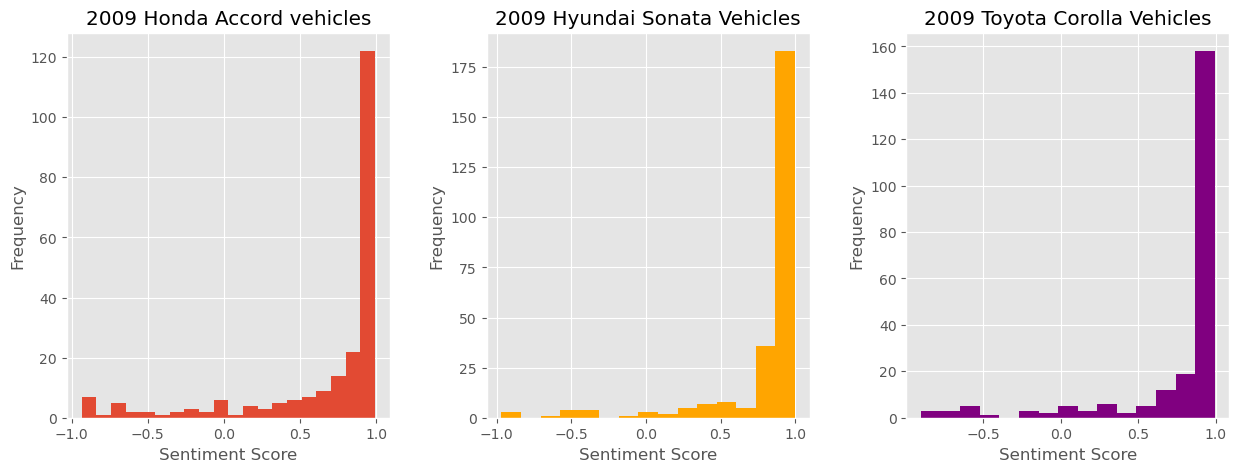

In [83]:
# step 3: visualize the results for more information
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace = 0.3)
ax[0].hist(df_2009_honda["Sentiment Score"], bins = 20)
ax[0].set_title("2009 Honda Accord vehicles")
ax[0].set_xlabel("Sentiment Score")
ax[0].set_ylabel("Frequency")

ax[1].hist(df_2009_hyundai["Sentiment Score"], bins = 15, color = "orange")
ax[1].set_title("2009 Hyundai Sonata Vehicles")
ax[1].set_xlabel("Sentiment Score")
ax[1].set_ylabel("Frequency")

ax[2].hist(df_2009_toyota["Sentiment Score"], bins = 15, color = "purple")
ax[2].set_title("2009 Toyota Corolla Vehicles")
ax[2].set_xlabel("Sentiment Score")
ax[2].set_ylabel("Frequency")

#### Interpretation: <br><br> According to the descriptive statistics above and also the histograms, it is clear that the 2009 Hyundai Sonata cars had the highest customer satisfaction rate with an average of 79.86% positive reviews and more than 175 satisfied customers.  

`e) Create appropriate wordclouds for each part to visualize the most frequent words in the reviews.`

In [84]:
#Get the honda accord 2008 comments as one body of text.
honda_accord_2008 = honda_2008_comments_clean[0]

for i in range(1,len(honda_2008_comments_clean)):
    honda_accord_2008 = honda_accord_2008 + " " + honda_2008_comments_clean[i]

    

#Get the honda accord 2009 comments as one body of text.
honda_accord_2009 = honda_2009_comments_clean[0]

for i in range(1,len(honda_2009_comments_clean)):
    honda_accord_2009 = honda_accord_2009 + " " + honda_2009_comments_clean[i]
    

    
#Get the hyundai sonata 2009 comments as one body of text.
hyundai_sonata_2009 = hyundai_2009_comments_clean[0]

for i in range(1,len(hyundai_2009_comments_clean)):
    hyundai_sonata_2009 = hyundai_sonata_2009 + " " + hyundai_2009_comments_clean[i]
    

    
#Get the toyota corolla 2009 comments as one body of text.
toyota_corolla_2009 = toyota_2009_comments_clean[0]

for i in range(1,len(toyota_2009_comments_clean)):
    toyota_corolla_2009 = toyota_corolla_2009 + " " + toyota_2009_comments_clean[i]

In [85]:
#Most frequently used words for the 2008 honda accord.
fdist = FreqDist(word_tokenize(honda_accord_2008))
freq_words_2008_honda_accord_df = pd.DataFrame(fdist.most_common(100))

freq_words_2008_honda_accord = freq_words_2008_honda_accord_df[0][0]

for i in range(1, len(freq_words_2008_honda_accord_df)):
    freq_words_2008_honda_accord = freq_words_2008_honda_accord + " " +  freq_words_2008_honda_accord_df[0][i]

    

#Most frequently used words for the 2009 honda accord.
fdist = FreqDist(word_tokenize(honda_accord_2009))
freq_words_2009_honda_accord_df = pd.DataFrame(fdist.most_common(100))

freq_words_2009_honda_accord = freq_words_2009_honda_accord_df[0][0]

for i in range(1, len(freq_words_2009_honda_accord_df)):
    freq_words_2009_honda_accord = freq_words_2009_honda_accord + " " +  freq_words_2009_honda_accord_df[0][i]
    
    

#Most frequently used words for the 2009 hyundai sonata.
fdist = FreqDist(word_tokenize(hyundai_sonata_2009))
freq_words_2009_hyundai_sonata_df = pd.DataFrame(fdist.most_common(100))

freq_words_2009_hyundai_sonata = freq_words_2009_hyundai_sonata_df[0][0]

for i in range(1, len(freq_words_2009_hyundai_sonata_df)):
    freq_words_2009_hyundai_sonata = freq_words_2009_hyundai_sonata + " " +  freq_words_2009_hyundai_sonata_df[0][i]
    
    

#Most frequently used words for the 2009 toyota corolla.
fdist = FreqDist(word_tokenize(toyota_corolla_2009))
freq_words_2009_toyota_corolla_df = pd.DataFrame(fdist.most_common(100))

freq_words_2009_toyota_corolla = freq_words_2009_toyota_corolla_df[0][0]

for i in range(1, len(freq_words_2009_toyota_corolla_df)):
    freq_words_2009_toyota_corolla = freq_words_2009_toyota_corolla + " " +  freq_words_2009_toyota_corolla_df[0][i]

Text(0.5, 1.0, 'Toyota Corolla 2009')

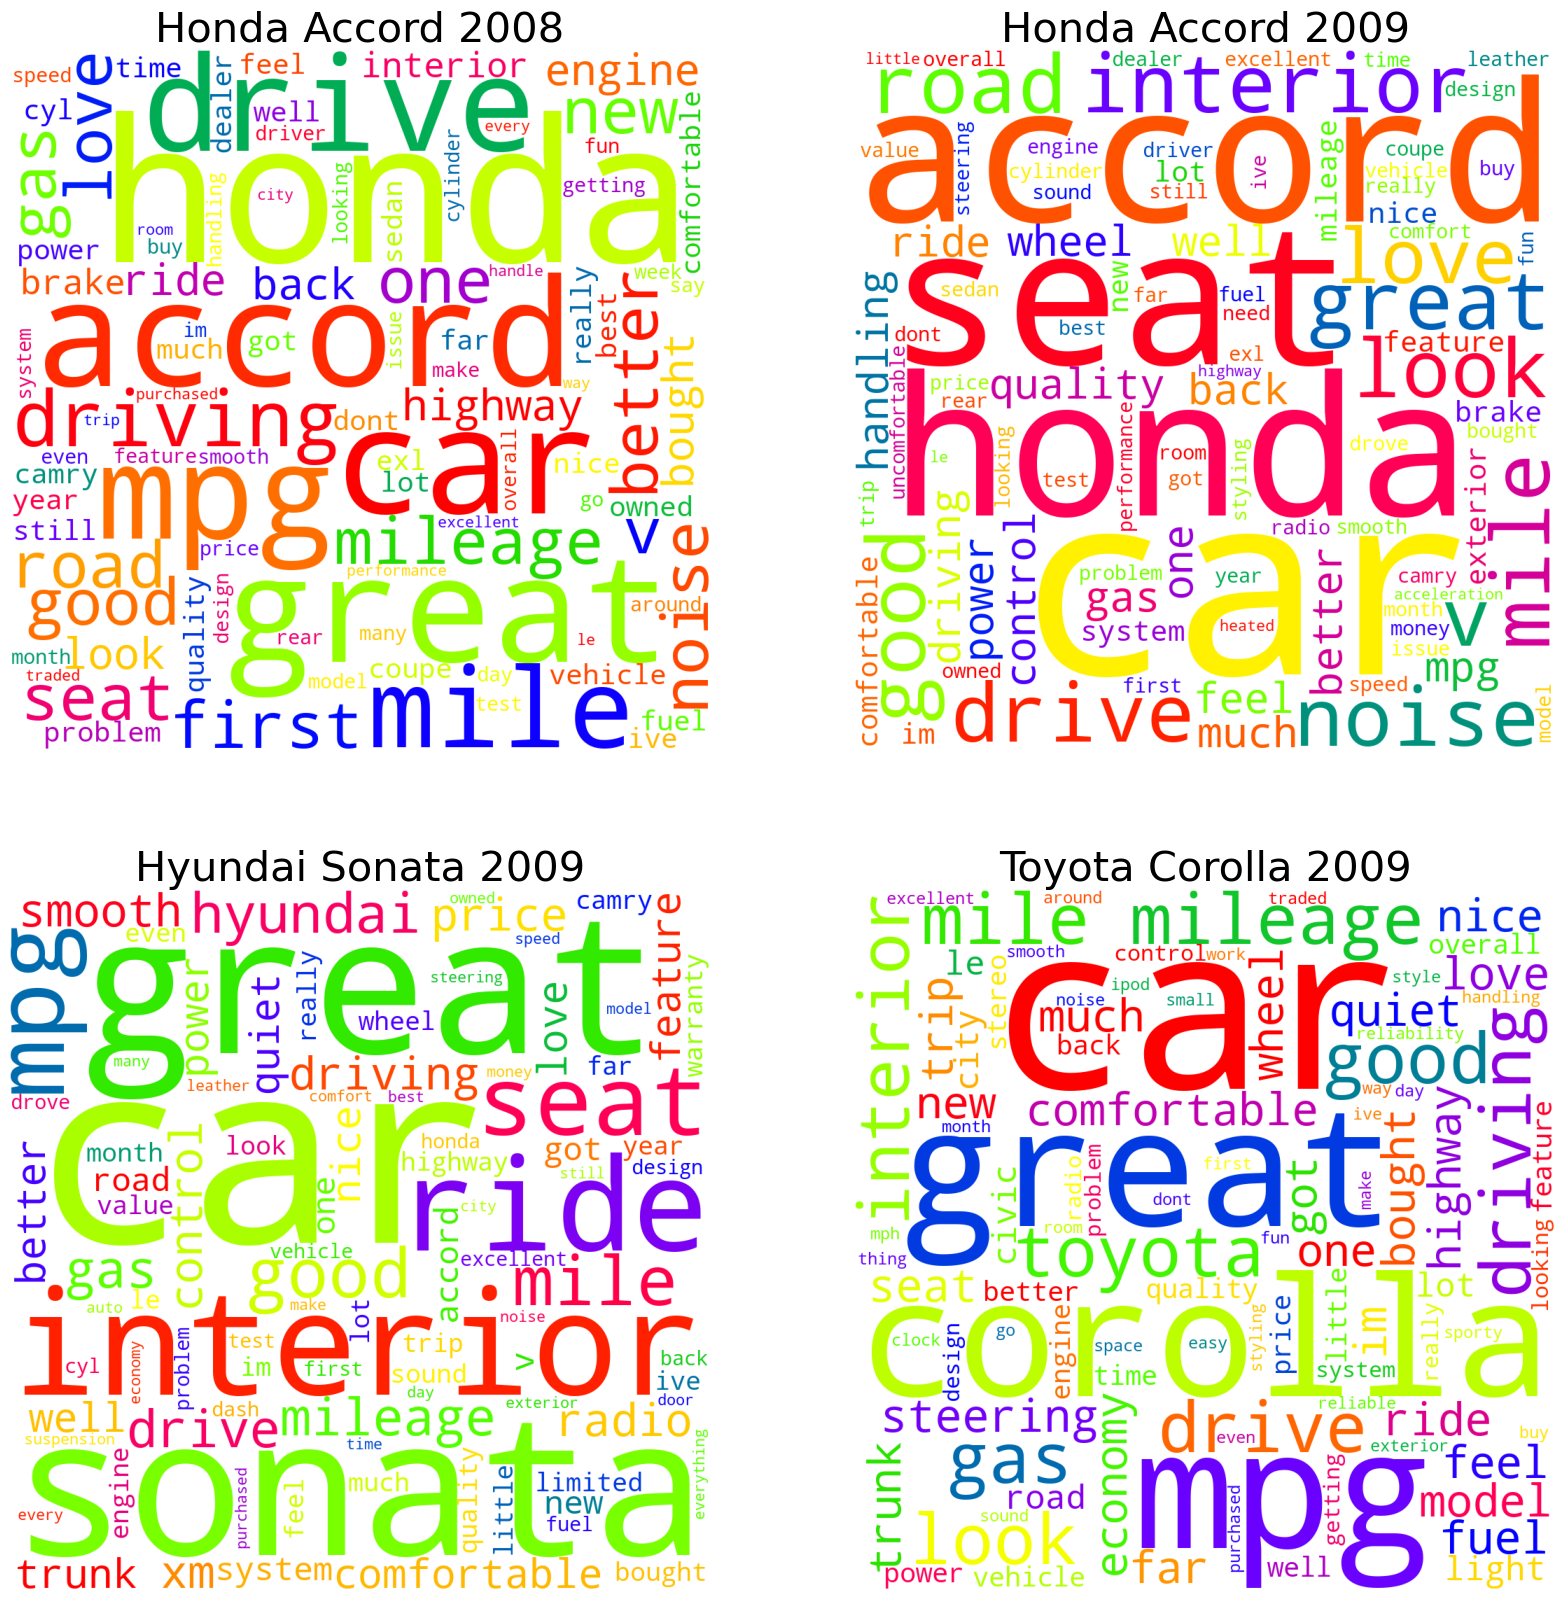

In [86]:
#Wordclouds of the most frequent words used in each of the car reviews.

wordcloud_honda_2008 = WordCloud(width = 1000, height = 1000,
                            background_color ='white', colormap = 'prism_r',
                            min_font_size = 15).generate(freq_words_2008_honda_accord)

wordcloud_honda_2009 = WordCloud(width = 1000, height = 1000,
                            background_color ='white', colormap = 'prism_r',
                            min_font_size = 15).generate(freq_words_2009_honda_accord)

wordcloud_hyundai_2009 = WordCloud(width = 1000, height = 1000,
                            background_color ='white', colormap = 'prism_r',
                            min_font_size = 15).generate(freq_words_2009_hyundai_sonata)

wordcloud_toyota_2009 = WordCloud(width = 1000, height = 1000,
                            background_color = "white", colormap = "prism_r",
                            min_font_size = 15).generate(freq_words_2009_toyota_corolla)

plt.figure(figsize = (20, 20), facecolor = None)

#Wordcloud for the 2008 honda accord.

plt.subplot(2, 2, 1)
plt.imshow(wordcloud_honda_2008)
plt.axis("off")
plt.title("Honda Accord 2008", fontsize = 30)

#Wordcloud for the 2009 honda accord.

plt.subplot(2, 2, 2)
plt.imshow(wordcloud_honda_2009)
plt.axis("off")
plt.title("Honda Accord 2009", fontsize = 30)

#Wordcloud for the 2009 hyundai sonata.
                    
plt.subplot(2, 2, 3)
plt.imshow(wordcloud_hyundai_2009)
plt.axis("off")
plt.title("Hyundai Sonata 2009", fontsize = 30)

#Wordcloud for the 2009 toyota corolla.

plt.subplot(2, 2, 4)
plt.imshow(wordcloud_toyota_2009)
plt.axis("off")
plt.title("Toyota Corolla 2009", fontsize = 30)

### Question 2: <br><br> Additionally, you want to investigate whether the satisfaction rate for the Honda Accord has improved from 2008 to 2009. To answer this question, you will also need to analyze the dataset 2008_honda_accord, which consists of customer reviews for the Honda Accord from the year 2008.

In [87]:
#d)
#lets analyze the sentiment score variable in both dataframes
df_2008_honda["Sentiment Score"] = df_2008_honda["2008 Honda Accord (Cleaned)"].apply(sentiment_analyzer)
df_2009_honda["Sentiment Score"] = df_2009_honda["2009 Honda Accord (Cleaned)"].apply(sentiment_analyzer) 


In [88]:
#d)
df_2008_honda["Sentiment Score"].describe()

count    540.000000
mean       0.568116
std        0.563938
min       -0.955700
25%        0.421500
50%        0.850250
75%        0.947025
max        0.992100
Name: Sentiment Score, dtype: float64

In [89]:
#d)
df_2009_honda["Sentiment Score"].describe()

count    224.000000
mean       0.659009
std        0.507678
min       -0.934900
25%        0.596025
50%        0.923800
75%        0.965375
max        0.994000
Name: Sentiment Score, dtype: float64

In [90]:
#d) using sentiment analysis techniques to investigate whether the satisfaction rate for Honda Accord has improved from 2008 to 2009.


#We need to calculate the mean of the sentiment score for the datasets 2008 and 2009 for Honda Accord
mean_sc_2008 = df_2008_honda["Sentiment Score"].mean()
mean_sc_2009 = df_2009_honda["Sentiment Score"].mean()

print(f"The mean Sentiment Score for 2008 Honda: {(mean_sc_2008)}")
print(f"The mean Sentiment Score for 2009 Honda: {(mean_sc_2009)}")

The mean Sentiment Score for 2008 Honda: 0.5681157407407408
The mean Sentiment Score for 2009 Honda: 0.659009375


In [91]:
#d) 

#lets compare the mean sentiment score for 2008 with that of 2009 to see if there was an improvement
if mean_sc_2009 > mean_sc_2008:
    print("Satisfaction rate for the Honda Accord improved from 2008 to 2009.")
elif mean_sc_2009 < mean_sc_2008:
    print("Satisfaction rate for the Honda Accord decreased from 2008 to 2009.")
else:
    print("Satisfaction rate for the Honda Accord remained the same from 2008 to 2009.")


Satisfaction rate for the Honda Accord improved from 2008 to 2009.


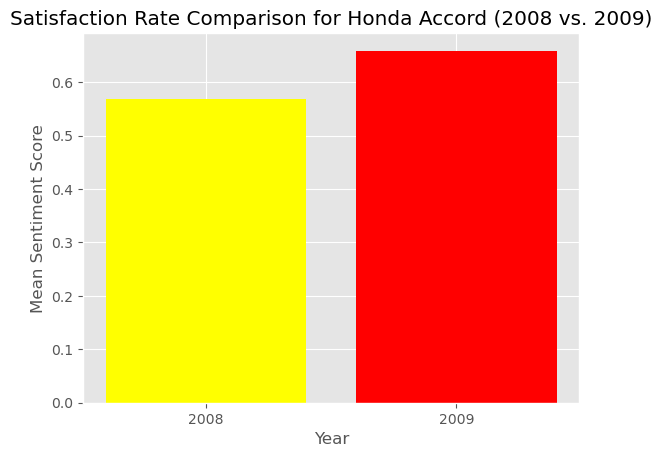

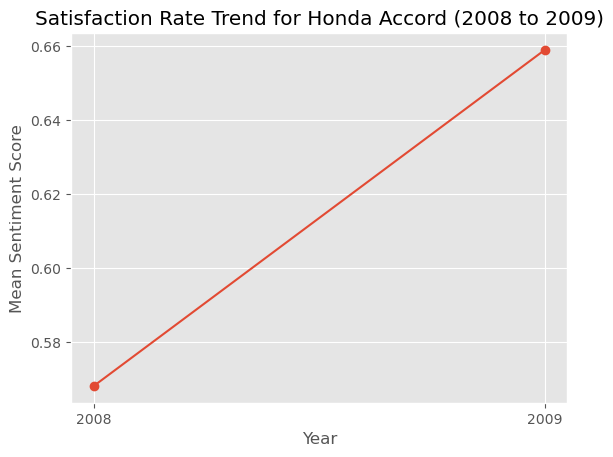

In [92]:
#d) 

#Visualization of the improvement using bar chart and a line plot

#Bar chart
years = ['2008', '2009']
sentiment_scores = [mean_sc_2008, mean_sc_2009]

plt.bar(years, sentiment_scores, color=['yellow', 'red'])
plt.xlabel('Year')
plt.ylabel('Mean Sentiment Score')
plt.title('Satisfaction Rate Comparison for Honda Accord (2008 vs. 2009)')
plt.show()



#line plot
years = ['2008', '2009']
sentiment_scores = [mean_sc_2008, mean_sc_2009]

plt.plot(years, sentiment_scores, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean Sentiment Score')
plt.title('Satisfaction Rate Trend for Honda Accord (2008 to 2009)')
plt.grid(True)
plt.show()


#### Interpretation: <br><br>The mean sentiment score for the 2008 Honda dataset was 0.568116 while the mean sentiment score for the 2009 Honda dataset was 0.659009. This suggests a positivity shift/increase in the sentiment expressed in the customer reviews. So customers on average expressed more positive feedbacks and opinions towards the 2009 Honda Accord than the 2008 Honda Accord. It therefore can be concluded that the satisfaction rate for the Honda accord improved from 2008 to 2009.

### Question 3: <br><br> In the end, your final goal is to categorize the customer reviews for the Honda Accord (only those of the year 2008) into 𝑘 meaningful groups.

`f) Determine the optimal value of 𝑘 from the set {2,3,4,5} in Question 3.`

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [94]:
# Obtaining the TF-IDF matrix
vectorizer = TfidfVectorizer()

vectorized_honda_2008_data = vectorizer.fit_transform(honda_2008_comments_clean)
vectorized_honda_2009_data = vectorizer.transform(honda_2009_comments_clean)
vectorized_hyundai_2009_data = vectorizer.transform(hyundai_2009_comments_clean)
vectorized_toyota_2009_data = vectorizer.transform(toyota_2009_comments_clean)

### Initial Technique

In [95]:
# Silhouette Score to measure how similar each data point is to the cluster we have assigned it to
# Initialize a list to store silhouette scores
silhouette_scores = []

# Iterate over a range of k values
for k in range(2, 6):
    # Initialize a KMeans object for the current k value
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=1235)
    cluster_labels = kmeans.fit_predict(vectorized_honda_2008_data)
    silhouette_avg = silhouette_score(vectorized_honda_2008_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"where k Is {k}, The Silhouette Average Score Is {silhouette_avg}")

# Find the best k value based on the highest silhouette score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"The best k value is: {best_k}")

where k Is 2, The Silhouette Average Score Is 0.00751350854713351
where k Is 3, The Silhouette Average Score Is 0.006020922714237121
where k Is 4, The Silhouette Average Score Is 0.005548062480887361
where k Is 5, The Silhouette Average Score Is 0.0051666463607950635
The best k value is: 2


### Final Technique

In [96]:
# Silhouette Score to measure how similar each data point is to the cluster we have assigned it to
silhouette_scores = []
for k in range(2, 6):
    # Step 1: Apply LDA to identify topics in the customer reviews
    # We apply LDA to our dataset so that we can identify the main topics or in this case the sentiment
    # within our customer review
    lda = LatentDirichletAllocation(n_components=k, random_state=1235)
    sentiment_assignments = lda.fit_transform(vectorized_honda_2008_data)
    
    # Step 2: Assign each review to one or more sentiments based on sentiment assignments
    assigned_sentiments = [sentiment_assignments[i].argmax() for i in range(len(honda_2008_comments_clean))]
    
    # Step 3: K-Means clustering to cluster reviews based on sentiment assignments
    kmeans = KMeans(n_clusters=k,n_init=20, random_state=1235)
    kmeans_clusters = kmeans.fit_predict(sentiment_assignments)
    kmeans.fit(vectorized_honda_2008_data)
    
    # Step 4: Obtain Silhouette score for each k value
    silhouette_avg = silhouette_score(sentiment_assignments, kmeans_clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"where k Is {k}, The Silhouette Average Score Is {silhouette_avg}")

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"The Optimal K Value Is: {best_k}")

where k Is 2, The Silhouette Average Score Is 0.935401847860681
where k Is 3, The Silhouette Average Score Is 0.8745840657204175
where k Is 4, The Silhouette Average Score Is 0.9541406151588494
where k Is 5, The Silhouette Average Score Is 0.9716446720419777
The Optimal K Value Is: 5


Based on our initial result we know that the optimal k value is 2 for the honda 2008 dataset. we know this because the silhouette average score is highest when the value is 2 with the silhoutte average being 0.0075. This is an extremely low score which would suggest that there is significant overlap between the clusters and thus showing us that the data points or in our case the text values we have are not distinct or well seperated into clusters as they should be.

Now based on our newest results obtained using LDA to identify the main topics within the text, we know that the optimal k value for the honda 2008 dataset is 5 with the silhouette average score being 0.9717. we can therefore conclude that the best k value to use is 5

`g) (optional) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.`

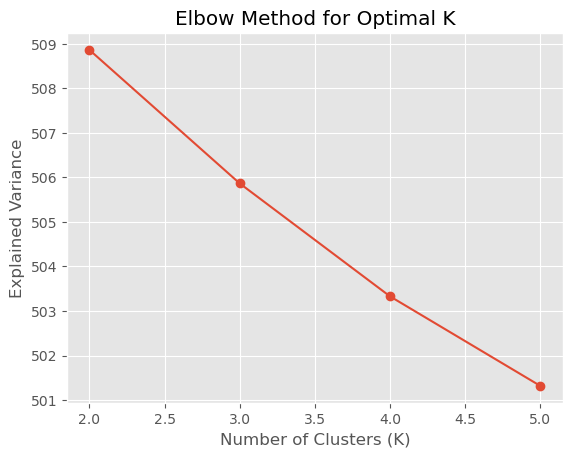

In [97]:
explained_variances = []

# Given a range of k values from k = {2,3,4,5}
for k in range(2, 6):
    kmeans_elbow = KMeans(n_clusters=k, n_init=20, random_state=1235)
    kmeans_elbow.fit(vectorized_honda_2008_data)
    explained_variances.append(kmeans_elbow.inertia_) 

# Plot the explained variances
plt.plot(range(2, 6), explained_variances, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Explained Variance')
plt.show()

`h) (optional) If you find that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets`

Honda 2009: 
Now based on our newest results obtained using LDA to identify the main topics within the text, we know that the optimal k value for the honda 2009 dataset is 4 with the silhouette average score being 0.9359 . we can therefore conclude that the best k value to use is 4

Hyundai 2009:
Now based on our newest results obtained using LDA to identify the main topics within the text, we know that the optimal k value for the hyundai 2009 dataset is 2 with the silhouette average score being 0.6527. we can therefore conclude that the best k value to use is 2

Toyota 2009:
Now based on our newest results obtained using LDA to identify the main topics within the text, we know that the optimal k value for the toyota 2009 dataset is 2 with the silhouette average score being 0.9630 . we can therefore conclude that the best k value to use is 2